In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/Synthetic_Clinical_Data.csv")
df.head()


,patient_id,age,gender,blood_pressure,cholesterol,glucose_level,heart_rate,bmi,smoker,num_visits_last_year,readmission,clinical_notes
0,1,69,Female,119.0,212.0,106.5,76.8,29.2,No,2,0,Patient shows signs of improvement.
1,2,32,Female,101.8,219.4,97.0,77.1,23.3,Yes,1,0,Follow-up required due to high cholesterol lev...
2,3,89,Male,110.2,185.5,90.7,82.6,25.3,No,0,0,Patient shows signs of improvement.
3,4,78,Male,120.7,247.2,68.1,99.6,25.8,No,3,0,"Elevated BP noted, recommended lifestyle changes."
4,5,38,Male,107.1,163.2,110.3,75.9,30.9,No,3,0,Patient reports shortness of breath and fatigue.


In [6]:
df.shape

(500, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            500 non-null    int64  
 1   age                   500 non-null    int64  
 2   gender                500 non-null    object 
 3   blood_pressure        500 non-null    float64
 4   cholesterol           500 non-null    float64
 5   glucose_level         500 non-null    float64
 6   heart_rate            500 non-null    float64
 7   bmi                   500 non-null    float64
 8   smoker                500 non-null    object 
 9   num_visits_last_year  500 non-null    int64  
 10  readmission           500 non-null    int64  
 11  clinical_notes        500 non-null    object 
dtypes: float64(5), int64(4), object(3)
memory usage: 47.0+ KB


In [8]:
df.dtypes

patient_id                int64
age                       int64
gender                   object
blood_pressure          float64
cholesterol             float64
glucose_level           float64
heart_rate              float64
bmi                     float64
smoker                   object
num_visits_last_year      int64
readmission               int64
clinical_notes           object
dtype: object

In [9]:
df.describe()

,patient_id,age,blood_pressure,cholesterol,glucose_level,heart_rate,bmi,num_visits_last_year,readmission
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,52.930000,121.060800,202.753000,100.208800,72.156400,26.964400,2.964000,0.298000
std,144.481833,21.009519,14.675906,30.446556,19.794514,9.635417,4.045579,1.649286,0.457838
min,1.000000,18.000000,79.500000,113.100000,39.600000,46.000000,15.000000,0.000000,0.000000
25%,125.750000,34.000000,111.600000,181.700000,87.175000,65.575000,24.500000,2.000000,0.000000
50%,250.500000,52.000000,120.900000,202.350000,99.650000,72.100000,26.800000,3.000000,0.000000
75%,375.250000,71.000000,130.425000,222.650000,113.525000,78.700000,29.525000,4.000000,1.000000
max,500.000000,89.000000,159.500000,278.100000,163.900000,103.100000,42.700000,8.000000,1.000000


In [10]:
df.isnull().sum()

patient_id              0
age                     0
gender                  0
blood_pressure          0
cholesterol             0
glucose_level           0
heart_rate              0
bmi                     0
smoker                  0
num_visits_last_year    0
readmission             0
clinical_notes          0
dtype: int64

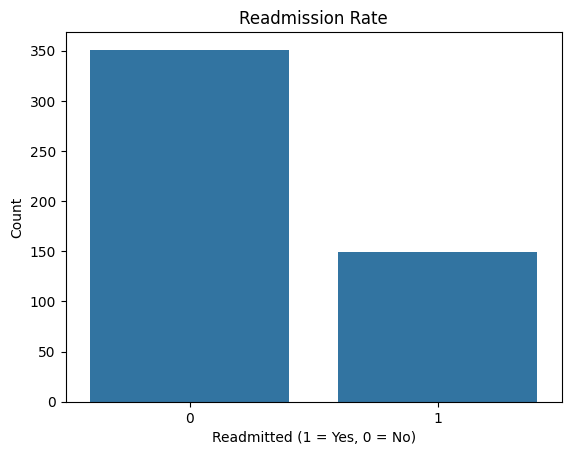

In [11]:
sns.countplot(data=df, x="readmission")
plt.title("Readmission Rate")
plt.xlabel("Readmitted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

Noticed a class imbalance for admission. Might need to use SMOTE

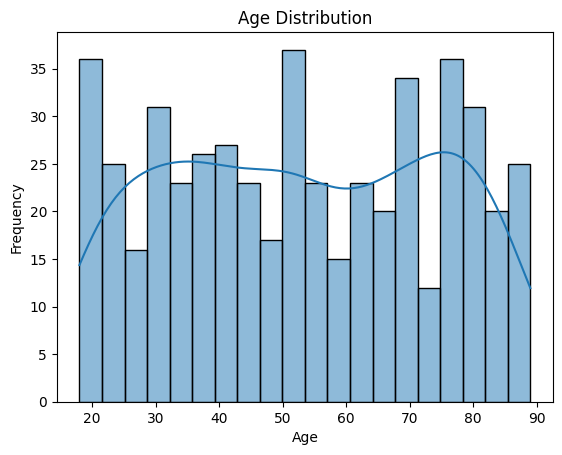

In [12]:
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

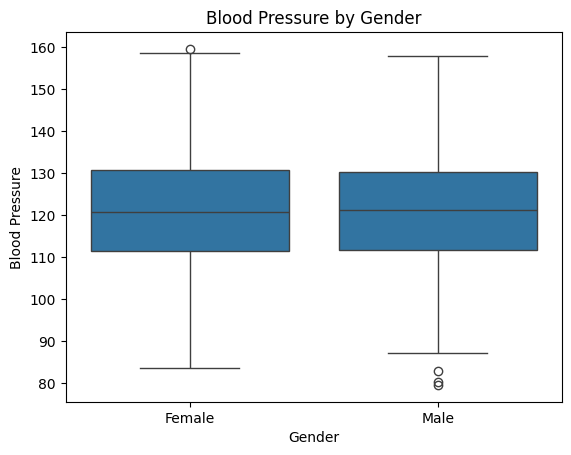

In [13]:
sns.boxplot(data=df, x="gender", y="blood_pressure")
plt.title("Blood Pressure by Gender")
plt.xlabel("Gender")
plt.ylabel("Blood Pressure")
plt.show()

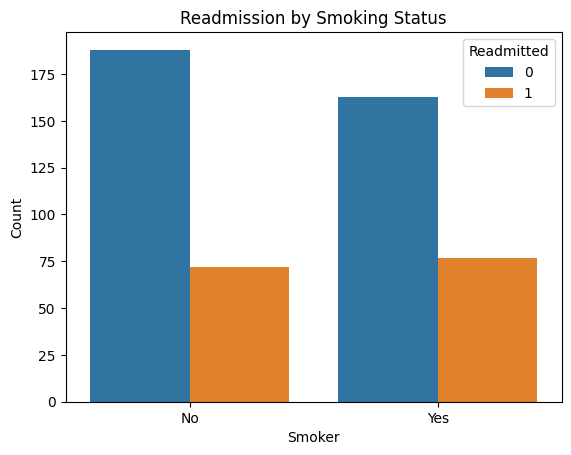

In [14]:
sns.countplot(data=df, x="smoker", hue="readmission")
plt.title("Readmission by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.legend(title="Readmitted")
plt.show()


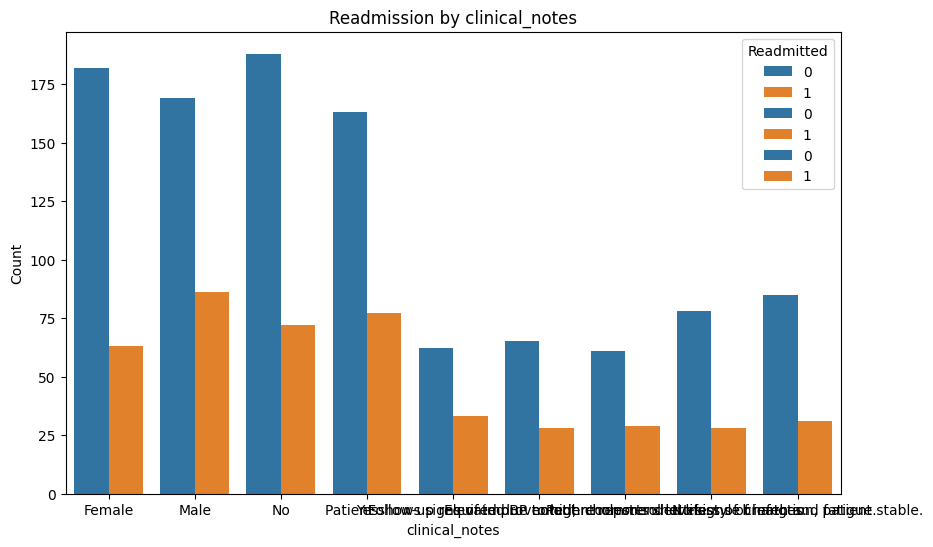

In [15]:
categorical = df.select_dtypes(include=['object']).columns  

plt.figure(figsize=(10,6))
for col in categorical:
    sns.countplot(data=df, x=col, hue="readmission")
    plt.title(f"Readmission by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Readmitted")
